In [2]:
cd /data/store01/data_dirs/students/ucfafyi/Sentinel

/data/store01/data_dirs/students/ucfafyi/Sentinel


In [3]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import linregress
%matplotlib inline
import sys
sys.path.append ( "..")
import gp_emulator
sys.path.insert(0,'python')
from fastRWpkl import *
from scipy import interpolate
from nicer_plot import *
from readSent import *
import pandas as pd
from Py6S import *
from multiprocessing import *
from Dload_Finder import *
from scipy import optimize
from sklearn import linear_model
from matplotlib import gridspec
from scipy.stats import gaussian_kde
from nicer_plot import *
from matplotlib import cm, colors
import scipy
plot_config()
from applied import *

/home/ucfafyi/.conda/envs/gdal_env/lib/python2.7/site-packages/matplotlib/__init__.py:878: UserWarning: axes.color_cycle is deprecated and replaced with axes.prop_cycle; please use the latter.
  warnings.warn(self.msg_depr % (key, alt_key))
/home/ucfafyi/.conda/envs/gdal_env/lib/python2.7/site-packages/matplotlib/__init__.py:878: UserWarning: svg.embed_char_paths is deprecated and replaced with svg.fonttype; please use the latter.
  warnings.warn(self.msg_depr % (key, alt_key))


In [4]:
psfsolve = [[ 0.94396372,  0.06337542],
[ 0.89290999,  0.03011558],
[ 1.06268167,  0.01038946],
[ 0.91907771,  0.01776961],
[ 0.94980581,  0.0258882 ],
[ 1.11922009, -0.02227448],
[ 0.96234873,  0.0159126 ]]
atmsolve = [[ 0.8959399 ,  0.        ,  0.05647779],
       [ 0.89892351,  0.        ,  0.02876397],
       [ 1.        ,  0.        ,  0.01429803],
       [ 0.93626743,  0.        ,  0.01866714],
       [ 0.95704675,  0.        ,  0.02120602],
       [ 1.        ,  0.        ,  0.00636866],
       [ 1.        ,  0.        ,  0.00777009]]
psfsolve = np.array(psfsolve)
atmsolve = np.array(atmsolve)

In [5]:
lat, lon, year = 37.181944, 114.36, 2016
sfiles, mfiles = get_closet(lat, lon,year,0)
keys = 'B02', 'B03','B04','B08','B8A','B11','B12'
bands = [2,3,4,8,13,11,12]
i=11
fpath = sfiles[i]
atmos = readmeteo(fpath+'auxiliary/ECMWFT')
ozone = np.mean(atmos['TCO3']*46.728972)
water = np.mean(atmos['TCWV']/10.)
print water, ozone
mete = readxml(fpath+'metadata.xml')
sz = mete['mSz']
sa = mete['mSa']
vz = mete['mVz']
va = mete['mVa']

0.510586465435 0.371318171103


In [6]:
pas = ['Date(dd-mm-yyyy)', 'Time(hh:mm:ss)', 'Julian_Day', 'AOT_1640', 
       'AOT_1020', 'AOT_870', 'AOT_675', 'AOT_667', 'AOT_555', 'AOT_551', 'AOT_532', 
       'AOT_531', 'AOT_500', 'AOT_490', 'AOT_443', 'AOT_440', 'AOT_412', 'AOT_380', 'AOT_340', 'Water(cm)']
df = pd.read_csv('160101_161231_SONET_Xingtai.dubovik', skiprows=3, na_values=["N/A"])
date = df[pas][6:13]
aero = np.array(date.AOT_1640),np.array(date.AOT_1020),np.array(date.AOT_870),np.array(date.AOT_675),np.array(date.AOT_500),np.array(date.AOT_440),np.array(date.AOT_380),np.array(date.AOT_340)
wv = [1640, 1020,870, 675, 500, 440, 380, 340]
aero = np.array(aero).T
date

,Date(dd-mm-yyyy),Time(hh:mm:ss),Julian_Day,AOT_1640,AOT_1020,AOT_870,AOT_675,AOT_667,AOT_555,AOT_551,AOT_532,AOT_531,AOT_500,AOT_490,AOT_443,AOT_440,AOT_412,AOT_380,AOT_340,Water(cm)
6,03:05:2016,01:22:19,124.057164,0.031955,0.041477,0.047839,0.060413,NaN,NaN,NaN,NaN,NaN,0.060192,NaN,NaN,0.069243,NaN,0.075497,0.070629,0.447453
7,03:05:2016,07:22:17,124.307141,0.081640,0.090919,0.101287,0.118541,NaN,NaN,NaN,NaN,NaN,0.135848,NaN,NaN,0.152733,NaN,0.174680,0.192274,0.760989
8,03:05:2016,08:37:27,124.359340,0.091557,0.102394,0.111964,0.129180,NaN,NaN,NaN,NaN,NaN,0.155331,NaN,NaN,0.176462,NaN,0.202620,0.220729,0.824685
9,03:05:2016,09:32:01,124.397234,0.097034,0.110542,0.120147,0.141056,NaN,NaN,NaN,NaN,NaN,0.180543,NaN,NaN,0.208450,NaN,0.244123,0.268813,0.877700
10,03:05:2016,10:06:10,124.420949,0.102942,0.117834,0.126913,0.147866,NaN,NaN,NaN,NaN,NaN,0.190915,NaN,NaN,0.219997,NaN,0.256489,0.279838,0.903077
11,03:05:2016,22:46:36,124.949028,0.110888,0.134589,0.139996,0.154928,NaN,NaN,NaN,NaN,NaN,0.181862,NaN,NaN,0.201206,NaN,0.222006,0.231482,1.120504
12,03:05:2016,23:13:34,124.967755,0.116685,0.139560,0.145124,0.159921,NaN,NaN,NaN,NaN,NaN,0.183771,NaN,NaN,0.201428,NaN,0.221696,0.231096,1.147006


In [7]:
sen_rsp = pd.ExcelFile('sp_rep/Sentbands.xlsx')
swl = np.array(sen_rsp.parse('Spectral Responses')['SR_WL'])
cname= 'SR_AV_B2', 'SR_AV_B3', 'SR_AV_B4', 'SR_AV_B8', 'SR_AV_B8A', 'SR_AV_B11', 'SR_AV_B12'
sen_rsr = [np.array(sen_rsp.parse('Spectral Responses')[i]) for i in cname]

In [38]:
wv[::-1]

[340, 380, 440, 500, 675, 870, 1020, 1640]

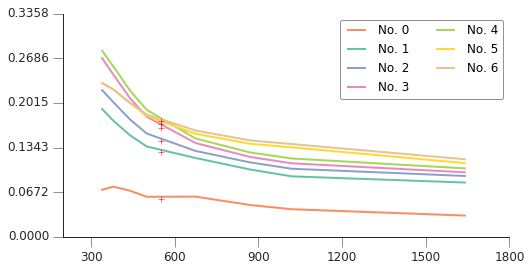

In [42]:
aot550 = []
fig = plt.figure(figsize=(8,4))
ax = fig.add_subplot(111)
for i,j in enumerate(aero[:,::-1]):
    ax.plot(wv[::-1], j, label = 'No. %s'%i)
    f = interpolate.interp1d(wv[::-1],j, kind='cubic')
    xnew = 550
    ynew = f(xnew)
    aot550.append(ynew)
    plt.plot(550, ynew, 'r+')
pretty_axes(ax)  
ax.set_yticks(np.linspace(0, 1.2*np.max(aero), 6))
plt.legend(ncol=2)

In [43]:
aot550

[array(0.057471480787990546),
 array(0.12735285990289918),
 array(0.14364615438401096),
 array(0.16419135037848276),
 array(0.1734720605027159),
 array(0.17043786085775892),
 array(0.17365157452923824)]

In [8]:
def ssssss(aot550, water, ozone, sa,sz, va, vz, sen_rsr):
    path = '/home/ucfafyi/DATA/Downloads/6SV2.1/sixsV2.1'
    s = SixS(path)
    #r_path = []
    #trans = []
    ss = []
    for band in range(7):
        s = SixS(path)
        s.altitudes.set_target_sea_level()
        s.altitudes.set_sensor_satellite_level()

        s.ground_reflectance = GroundReflectance.HomogeneousLambertian(GroundReflectance.GreenVegetation)
        s.geometry = Geometry.User()
        s.geometry.solar_a = 0
        s.geometry.solar_z = 0
        s.geometry.view_a = va[band]
        s.geometry.view_z = vz[band]
        srsp = sen_rsr[band]
        wv, we = swl[srsp!=0]/1000.,srsp[srsp!=0]
        mi,ma = round(wv.min(),3),round(wv.max(),3)
        f = interpolate.interp1d(wv,we)
        xnew = np.arange(mi,ma,0.0025)
        ynew = f(xnew)
        s.wavelength = Wavelength(xnew[0],xnew[-1],ynew)
        s.aero_profile = AeroProfile.PredefinedType(AeroProfile.Continental)
        s.aot550 = aot550
        s.atmos_profile = AtmosProfile.UserWaterAndOzone(water, ozone)
        s.run()
        #r_path.append(s.outputs.atmospheric_intrinsic_reflectance)
        #trans.append(s.outputs.transmittance_total_scattering.total)
        ss.append(s)
    return ss

In [9]:
simud = [ssssss(i,water, ozone, sa, sz, va,vz, sen_rsr) for i in np.linspace(0.00, 0.36, 100)]

In [11]:
a1 = simud[0][0]

In [12]:
len(simud)

100

In [13]:
aots = np.linspace(0.005, 0.4, 100)

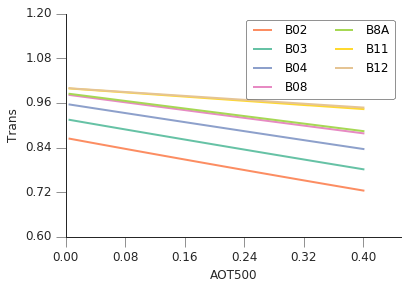

In [14]:
names = ['B02', 'B03', 'B04', 'B08', 'B8A', 'B11', 'B12']
fig = plt.figure()
ax = fig.add_subplot(111)
for i in range(7):
    trans = [ii[i].outputs.transmittance_total_scattering.total for ii in simud]
    ax.plot(aots, trans, label = '%s'%names[i])
ax.legend(loc = 'best', ncol = 2)
pretty_axes(ax)
ax.set_yticks(np.linspace(0.6, 1.2, 6))
ax.set_xlabel('AOT500')
ax.set_ylabel('Trans')

In [15]:
simud[0]

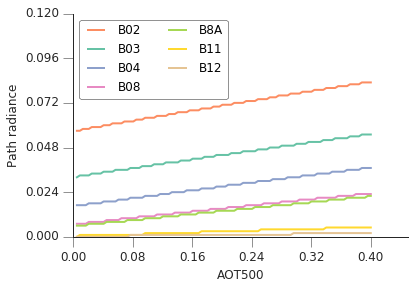

In [101]:
names = ['B02', 'B03', 'B04', 'B08', 'B8A', 'B11', 'B12']
fig = plt.figure()
ax = fig.add_subplot(111)
for i in range(7):
    path = [ii[i].outputs.atmospheric_intrinsic_reflectance for ii in simud]
    ax.plot(aots, path, label = '%s'%names[i])
ax.legend(loc = 'best', ncol = 2)
pretty_axes(ax)
ax.set_yticks(np.linspace(0, 1.2*0.1, 6))
ax.set_xlabel('AOT500')
ax.set_ylabel('Path radiance')

In [11]:
rasi = [j.outputs.atmospheric_intrinsic_reflectance for i in simud for j in i]

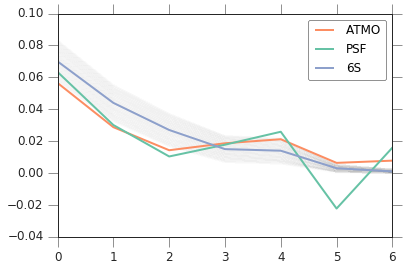

In [12]:
for i in range(len(rasi)/7):
    plt.plot(rasi[i*7:i*7+7], color = 'gray', alpha=0.01)
plt.plot(atmsolve.T[2], label='ATMO')
plt.plot(psfsolve.T[1],label='PSF')
r_path = ssssss(0.1734720605027159,water, ozone, sa, sz, va,vz, sen_rsr)
six_path = [i.outputs.atmospheric_intrinsic_reflectance for i in r_path]
plt.plot(six_path, label = '6S')
plt.legend(loc='best')

In [35]:
ratrans = [j.outputs.transmittance_total_scattering.total for i in simud for j in i]

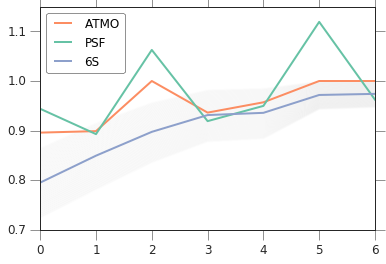

In [21]:
for i in range(len(ratrans)/7):
    plt.plot(ratrans[i*7:i*7+7], color = 'gray', alpha=0.01)
plt.plot(atmsolve.T[0], label='ATMO')
plt.plot(psfsolve.T[0],label='PSF')
r_path = ssssss(0.1734720605027159,water, ozone, sa, sz, va,vz, sen_rsr)
six_trans = [i.outputs.transmittance_total_scattering.total for i in r_path]
plt.plot(six_trans, label = '6S')
plt.legend(loc='best')

In [135]:
def cost(aot):
    sixs = ssssss(aot ,water, ozone, sa, sz, va,vz, sen_rsr)
    six_trans = np.array([i.outputs.transmittance_total_scattering.total for i in sixs])
    six_path = np.array([i.outputs.atmospheric_intrinsic_reflectance for i in sixs])
    costs = np.sum((atmsolve.T[2] - six_path)**2)+ np.sum((atmsolve.T[0][3:] - six_trans[3:])**2)
    print aot, costs
    return costs

In [136]:
p=0.17
sol = optimize.fmin(cost,p,full_output=1)

[ 0.17] 0.00252024724832
[ 0.1785] 0.00282747830672
[ 0.1615] 0.00224269001492
[ 0.153] 0.00200889895012
[ 0.136] 0.00162720089472
[ 0.119] 0.00137748297292
[ 0.085] 0.00126224765212
[ 0.051] 0.00169858788412
[ 0.051] 0.00169858788412
[ 0.102] 0.00126689478252
[ 0.068] 0.00140639077812
[ 0.0935] 0.00125056756552
[ 0.102] 0.00126689478252
[ 0.08925] 0.00124312571132
[ 0.085] 0.00126224765212
[ 0.091375] 0.00123602487592
[ 0.0935] 0.00125056756552
[ 0.0903125] 0.00123930546792
[ 0.0924375] 0.00123342953252
[ 0.0935] 0.00125056756552
[ 0.0935] 0.00125056756552
[ 0.09190625] 0.00123500682992
[ 0.09296875] 0.00125183461152
[ 0.09217187] 0.00123421766372
[ 0.09270312] 0.00123306491772
[ 0.09296875] 0.00125183461152
[ 0.09296875] 0.00125183461152
[ 0.09257031] 0.00123344058332
[ 0.09257031] 0.00123344058332
[ 0.09283594] 0.00125216931212
[ 0.09263672] 0.00123325175052
Optimization terminated successfully.
         Current function value: 0.001233
         Iterations: 15
         Function eval

In [ ]:
sol

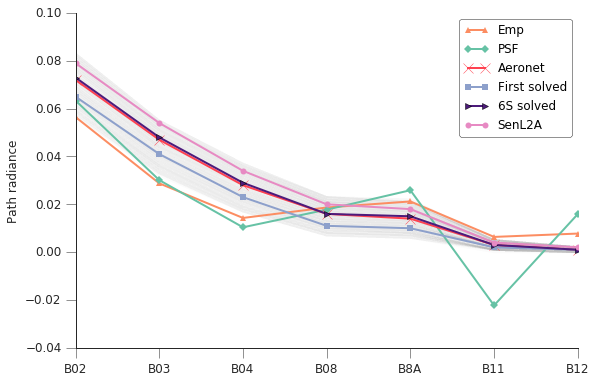

In [37]:
fig, ax = plt.subplots(figsize = (9,6))
for i in range(len(rasi)/7):
    ax.plot(rasi[i*7:i*7+7], color = 'gray', alpha=0.03)
ax.plot(atmsolve.T[2], '-^', label='Emp', mew=0)
ax.plot(psfsolve.T[1],'-D',label='PSF', mew=0)
r_path = ssssss(0.18441004437388758,0.36500111323310214, 0.034324836711471934, sa, sz, va,vz, sen_rsr)
sol_path = ssssss(0.19953599972771441, 0.38800000000000001, 0.037004, sa, sz, va,vz, sen_rsr)
sen2a = ssssss(0.27700000000000002, 0.38800000000000001, 0.037004,sa, sz, va,vz, sen_rsr)
first = ssssss(0.09270312, 0.38800000000000001, 0.037004, sa, sz, va,vz, sen_rsr)
s_path = [i.outputs.atmosph beric_intrinsic_reflectance for i in sol_path]
six_path = [i.outputs.atmospheric_intrinsic_reflectance for i in r_path]
first_path = [i.outputs.atmospheric_intrinsic_reflectance for i in first]
sen2a_path = [i.outputs.atmospheric_intrinsic_reflectance for i in sen2a]
ax.plot(six_path, '-x',label = 'Aeronet', markersize=10,color='#ff4150')
ax.plot(first_path,'-s', label = 'First solved', mew=0)
ax.plot(s_path, '->', label = '6S solved', color='#4d1b7b')
ax.plot(sen2a_path, '-o', label = 'SenL2A', mew=0)
ax.set_ylabel('Path radiance')
ax.set_xticklabels(keys)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.xaxis.set_ticks_position('bottom')
ax.yaxis.set_ticks_position('left')
plt.legend(loc='best')

In [19]:
ax.plot?

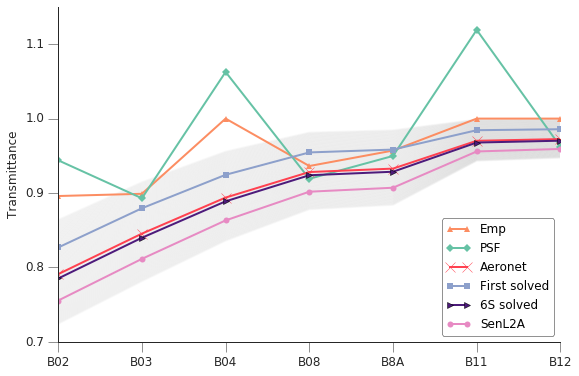

In [38]:
keys = 'B02', 'B03','B04','B08','B8A','B11','B12'
#fig = plt.figure(figsize=(4,9))
fig, ax = plt.subplots(figsize = (9,6))
for i in range(len(ratrans)/7):
    ax.plot(ratrans[i*7:i*7+7], color = 'gray', alpha=0.05)
#ax.plot(atmsolve.T[0], label='ATMO')
#ax.plot(psfsolve.T[0],label='PSF')
ax.plot(atmsolve.T[0], '-^', label='Emp', mew=0)
ax.plot(psfsolve.T[0],'-D',label='PSF', mew=0)
six_trans = [i.outputs.transmittance_total_scattering.total for i in r_path]
s_trans = [i.outputs.transmittance_total_scattering.total for i in sol_path]
first_trans = [i.outputs.transmittance_total_scattering.total for i in first]
sen2a_trans = [i.outputs.transmittance_total_scattering.total for i in sen2a]
#ax.plot(six_trans, label = 'Aeronet')
#ax.plot(first_trans, label = 'First solved')
#ax.plot(s_trans, label = '6S solved')
#ax.plot(sen2a_trans, label = 'SenL2A')
ax.plot(six_trans, '-x',label = 'Aeronet', markersize=10,color='#ff4150')
ax.plot(first_trans,'-s', label = 'First solved', mew=0)
ax.plot(s_trans, '->', label = '6S solved', color='#4d1b7b')
ax.plot(sen2a_trans, '-o', label = 'SenL2A', mew=0)
ax.set_ylabel('Transmittance')
ax.set_xticklabels(keys)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.xaxis.set_ticks_position('bottom')
ax.yaxis.set_ticks_position('left')
plt.legend(loc=4)

In [138]:
def second(trans, S, ro):
    print trans, S, ro
    second = (trans*ro)/(1-S*ro)
    return second

In [10]:
def get_closet(lat, lon, year, p=True):
    
    m = mgrs.MGRS()
    mg_coor = m.toMGRS(lat, lon, MGRSPrecision=4)
    
    h,v = mtile_cal(lat, lon)
    
    sfnames = np.sort(file_finder('s_data'))
    #print sfnames[0][7:9] ==mg_coor[:2], sfnames[0][10]==mg_coor[2], sfnames[0][12:14]==mg_coor[3:5]
    dates = np.array([i.split('/')[-5:-2] for i in sfnames if ((i[-7:]=='B01.jp2')&(i[7:9]==mg_coor[:2])&(i[10]==mg_coor[2])&(i[12:14]==mg_coor[3:5]))&(i[15:19]=='%s'%year)]).astype(int)
    sdates = np.array([datetime .datetime(i[0], i[1], i[2]).timetuple().tm_yday for i in dates])
    sdates.sort()
    mfnames = file_finder('m_data')
    mdates = np.array([i.split('.')[1][5:] for i in mfnames if (i[len('m_data')+1:len('m_data')+8]=='MCD43A1')&(i.split('.')[1][1:5]=='%s'%year)&(i.split('.')[2]=='h%02dv%02d'%(h,v))]).astype(int)
    mdates.sort()
    if p:
        print 'sentinel dates: ',sdates, '\nmodis dates, ', mdates, '\n'
    
    try:
        dif = abs(sdates.reshape(len(sdates),1)-mdates)
        si,mi = np.where(dif<4)
        sdi = []
        mdi = []
        for i,j in enumerate(sdates[si]):
            sd = datetime.datetime(year, 1, 1) + datetime.timedelta(j - 1)
            y,m,d = sd.year, sd.month, sd.day
            sdi.append(directory + 's_data'+'/%s/%s/%s/%s/%s/%s/0/'%(mg_coor[:2], mg_coor[2], mg_coor[3:5], y,m,d))
            mdi.append([directory+ii for ii in mfnames if ((ii.split('.')[1])[1:]=='%s%03d'%(year,mdates[mi][i]))&(ii.split('.')[2]=='h%02dv%02d'%(h,v))])
        if p:
            print 'modis files: ', np.array(mdi),'\n\n', 'sentinel files directory: ', np.array(sdi), '\n'
        return np.array(sdi), np.array(mdi)
    except:
        print 'One/both of two kinds of file dose not exist, see above if print is True!!'
        return 0

In [13]:
lat, lon, year = 37.181944, 114.36, 2016
sfiles, mfiles = get_closet(lat, lon,year,0)

keys = 'B02', 'B03','B04','B08','B8A','B11','B12'
bands = [2,3,4,8,13,11,12]

for i in [8, 11, 15, 17]:
    
    print sfiles[i],'\n', mfiles[i], '\n'

/home/ucfafyi/DATA/Sentinel/s_data/50/S/KG/2016/4/13/0/ 
[ '/home/ucfafyi/DATA/Sentinel/m_data/MCD43A1.A2016105.h27v05.005.2016122100738.hdf'
 '/home/ucfafyi/DATA/Sentinel/m_data/MCD43A2.A2016105.h27v05.005.2016122100739.hdf'] 

/home/ucfafyi/DATA/Sentinel/s_data/50/S/KG/2016/5/3/0/ 
[ '/home/ucfafyi/DATA/Sentinel/m_data/MCD43A1.A2016121.h27v05.005.2016140192730.hdf'
 '/home/ucfafyi/DATA/Sentinel/m_data/MCD43A2.A2016121.h27v05.005.2016140192731.hdf'] 

/home/ucfafyi/DATA/Sentinel/s_data/50/S/KG/2016/6/12/0/ 
[ '/home/ucfafyi/DATA/Sentinel/m_data/MCD43A1.A2016161.h27v05.005.2016183110712.hdf'
 '/home/ucfafyi/DATA/Sentinel/m_data/MCD43A2.A2016161.h27v05.005.2016183110712.hdf'] 

/home/ucfafyi/DATA/Sentinel/s_data/50/S/KG/2016/6/22/0/ 
[ '/home/ucfafyi/DATA/Sentinel/m_data/MCD43A1.A2016177.h27v05.005.2016194191852.hdf'
 '/home/ucfafyi/DATA/Sentinel/m_data/MCD43A2.A2016177.h27v05.005.2016194191852.hdf'] 



In [14]:
psf = [[  24.78162257,  319.75603031,    7.60898016,  -20.44817067, 61.27414215],
[  24.98695115,  312.02695267,    7.9308606 ,  -21.20931201, 59.01870048],
[  23.97447645,  306.15258185,    7.91598097,  -21.56165644, 59.7537709 ],
[  24.41782056,  306.04039495,    7.97986228,  -22.27513358, 59.27710844],
[  24.41736189,  308.74673509,    7.87068097,  -21.64732953, 61.26454941],
[  23.97447188,  306.15258185,    7.91598248,  -21.56165644, 59.7537709 ],
[  24.02092481,  304.79130493,    8.01491173,  -20.96258739, 59.98666719]]

In [15]:
lat, lon, year = 37.181944, 114.36, 2016

In [16]:
fpath = '/home/ucfafyi/DATA/Sentinel/s_data/50/S/KG/2016/5/3/0/'
mfile = [ '/home/ucfafyi/DATA/Sentinel/m_data/MCD43A1.A2016121.h27v05.005.2016140192730.hdf',
 '/home/ucfafyi/DATA/Sentinel/m_data/MCD43A2.A2016121.h27v05.005.2016140192731.hdf']

In [17]:
to_regs = applied(lat, lon, fpath, mfile, psf)


Here is the cloud probability calculation!

/home/ucfafyi/DATA/Sentinel/s_data/50/S/KG/2016/5/3/0/ (2, 3, 4, 8, 11, 12, 13)
7%
14%
21%
29%
36%
43%
50%
57%
64%
71%
79%
86%
93%
99%
Done!!!
DOY:  121 
Location:  50SKG
Cloud proportion:  0.0217098649308


In [18]:
to_regs

[[2,
  array([  77,   78,   79, ..., 9922, 9923, 9925]),
  array([8207, 8253, 8300, ..., 4537, 4584, 4630]),
  array([ 0.12587852,  0.11918578,  0.11095867, ...,  0.10127359,
          0.09500532,  0.09336921]),
  masked_array(data = [0.046 0.036000000000000004 0.028 ..., 0.04124930406396476
   0.03158813405162911 0.027609731044699107],
               mask = [False False False ..., False False False],
         fill_value = 1e+20)],
 [3,
  array([  76,   77,   78, ..., 9922, 9924, 9925]),
  array([8205, 8251, 8298, ..., 4582, 4628, 4675]),
  array([ 0.11749805,  0.11069003,  0.10239213, ...,  0.09096375,
          0.08855249,  0.09113445]),
  masked_array(data = [0.07100000000000001 0.07100000000000001 0.054 ..., 0.06636647265447104
   0.062046686144838215 0.06338806964754103],
               mask = [False False False ..., False False False],
         fill_value = 1e+20)],
 [4,
  array([  75,   76,   77, ..., 9921, 9923, 9924]),
  array([8206, 8252, 8299, ..., 4583, 4629, 4676]),
  arra

In [19]:
indx, indy = to_regs[0][1], to_regs[0][2]

In [20]:
m, s = to_regs[0][3], to_regs[0][4]

In [22]:
to_reg = [[i[3], i[4]] for i in to_regs]

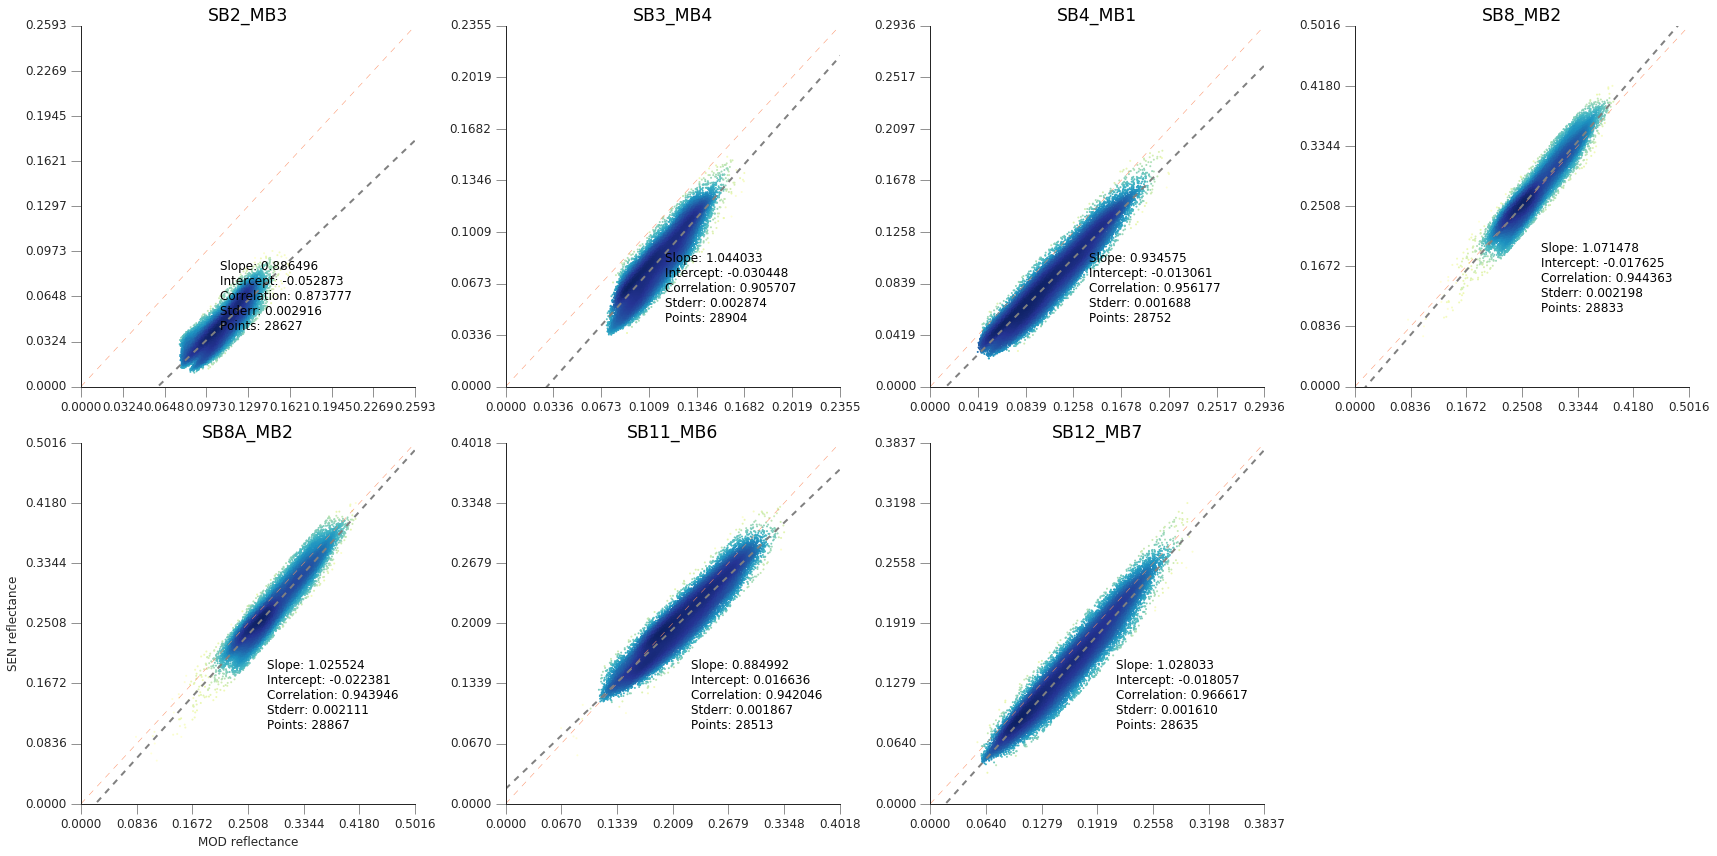

In [23]:
plot_config()
fig = plt.figure()
gs = gridspec.GridSpec(2,4)  # generate a grid space
fig = plt.figure(figsize=(24,12))
names = ('SB2_MB3,SB3_MB4,SB4_MB1,SB8_MB2,SB8A_MB2,SB11_MB6,SB12_MB7').split(',')
cmap = cm.get_cmap('YlGnBu')
psfsolve = []
for i in range(7):
    ax = fig.add_subplot(gs[i])
    s,m = to_reg[i]
    
    mval = np.nanmax([s,m])
    fit = np.polyfit(m,s,1)
    fit_fn = np.poly1d(fit)
    xy = np.vstack([m,s])
    z = gaussian_kde(xy)(xy)
    ax.scatter(m,s, c=z, s=4, edgecolor='',norm=colors.LogNorm(vmin=z.min(), vmax=z.max()*1.2), cmap = cmap)
    ax.plot([0,1],[0.,1], '--',linewidth=0.5)
    ax.plot(np.arange(0,1,0.1), fit_fn(np.arange(0,1,0.1)), '--', color='grey')
    slope,inter, rval, pval, std = r = scipy.stats.linregress(m,s)
    ax.set_title('%s'%names[i])
    ax.text(mval*(4./6.),mval*(1.5/6.),'Slope: %02f \nIntercept: %02f \nCorrelation: %02f \nStderr: %02f \nPoints: %s'%(slope,inter, rval, std, len(m)), 
        )
    pretty_axes(ax)
    ax.set_xlim(0,mval)
    ax.set_ylim(0,mval)
    ax.set_yticks(np.arange(0,mval+0.1,mval/5.))
    ax.set_xticks(np.arange(0,mval+0.1,mval/5.))
    if i==4:
        ax.set_xlabel ( "MOD reflectance")
        ax.set_ylabel ( "SEN reflectance")
    psfsolve.append([slope,inter])
plt.tight_layout()

In [27]:
def atm(p,sref = None, sen_rsr = None, band = None, angles = None):
    aot550, water, ozone = p
    print p
    sa,sz, va, vz = angles
    path = '/home/ucfafyi/DATA/Downloads/6SV2.1/sixsV2.1'
    s = SixS(path)
    ss = []
    
    s = SixS(path)
    s.altitudes.set_target_sea_level()
    s.altitudes.set_sensor_satellite_level()

    s.ground_reflectance = GroundReflectance.HomogeneousLambertian(GroundReflectance.GreenVegetation)
    s.geometry = Geometry.User()
    s.geometry.solar_a = sa
    s.geometry.solar_z = sz
    s.geometry.view_a = va[band]
    s.geometry.view_z = vz[band]
    srsp = sen_rsr[band]
    wv, we = swl[srsp!=0]/1000.,srsp[srsp!=0]
    mi,ma = round(wv.min(),3),round(wv.max(),3)
    f = interpolate.interp1d(wv,we)
    xnew = np.arange(mi,ma,0.0025)
    ynew = f(xnew)
    s.wavelength = Wavelength(xnew[0],xnew[-1],ynew)
    s.aero_profile = AeroProfile.PredefinedType(AeroProfile.Continental)
    s.aot550 = aot550
    s.atmos_profile = AtmosProfile.UserWaterAndOzone(water, ozone)
    s.atmos_corr = AtmosCorr.AtmosCorrLambertianFromReflectance(sref)
    s.run()
    return s.outputs.atmos_corrected_reflectance_lambertian


In [28]:
sa, sz, va

(array([ 143.37178471]),
 array([ 25.65012217]),
 array([ 111.39404288,  110.97246877,  113.21727347,  116.63309692,
         114.32734662,  112.9980871 ,  112.39241577,  111.95750344,
         111.56658455,  115.35167857,  111.26675666,  111.85397953,
         110.99311741]))

In [29]:
to_regs[0][2]

array([8207, 8253, 8300, ..., 4537, 4584, 4630])

In [38]:
def cost(p, args = None):
    if any(p>1) or any(p<0):
        return 10000
    else:
        sref, mref, sen_rsr , band , angles = args
        ss = atm(p, sref = sref, sen_rsr = sen_rsr, band = band, angles = angles)
        cost = abs(mref-ss)
        return cost

In [39]:
p = np.array([0.09,0.510586465435, 0.371318171103])
up = np.array([1,1,1])
down = np.array([0, 0, 0])
bounds = np.array([down, up])

solved = []
def opt(i):
    args = to_regs[0][3][i], to_regs[0][4][i], sen_rsr,0, [sa,sz, va, vz]
    psolve = optimize.fmin(cost,p, full_output=1, args=(args,))
    return [(indx[i], indy[i]),psolve]

In [ ]:
pool = multiprocessing.Pool(processes = 16)
retval = pool.map(opt, range(len(to_regs[0][2]))
pool.close()
pool.join()

In [1]:
#parallel_rw_pkl(retval, 'aeronet', 'w')

NameError: name 'parallel_rw_pkl' is not defined